In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Hyperparameters
batch_size = 64
hidden_dim_1 = 128
hidden_dim_2 = 64
hidden_dim_3 = 32
latent_dim = 10
l_rate = 0.001
n_epochs = 100

In [3]:
## Dataset prep
transform = transforms.ToTensor()
train_dataset = datasets.MNIST("./data", train=True, transform=transform, download=True)
train_load = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [4]:
## Encoder and decoder 
encoder = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,hidden_dim_1),
    nn.ReLU(),
    nn.Linear(hidden_dim_1,hidden_dim_2),
    nn.ReLU(),
    nn.Linear(hidden_dim_2, hidden_dim_3),
    nn.ReLU(),
    nn.Linear(hidden_dim_3, latent_dim),
    nn.Sigmoid()
)

decoder = nn.Sequential(
    nn.Linear(latent_dim, hidden_dim_3),
    nn.ReLU(),
    nn.Linear(hidden_dim_3, hidden_dim_2),
    nn.ReLU(),
    nn.Linear(hidden_dim_2, hidden_dim_1),
    nn.ReLU(),
    nn.Linear(hidden_dim_1, 28*28),
    nn.Sigmoid(),
    nn.Unflatten(1, (1, 28, 28))
    
)

In [5]:
## Class and init of the model

class Autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Model init
ae = Autoencoder(encoder, decoder).to(device)

In [6]:
## Périda y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(ae.parameters(), lr=l_rate)

In [7]:
# Generación de imagenes
def plot_reconstructions(model, data_loader, epoch):
    model.eval()
    with torch.no_grad():
        original_img, _ = next(iter(data_loader))
        original_img = original_img.to(device)
        recons_img, _ = model(original_img)

    original_img = original_img.cpu()
    recons_img = recons_img.cpu()

    figs, axes = plt.subplots(2, 10, figsize=(12,5))
    for i in range(10):
        #imagenes originales
        axes[0,i].imshow(original_img[i].squeeze(), cmap="grey")
        axes[0,i].axis("off")
        if i == 4:
            axes[0,i].set_title(f"Epoch {epoch+1}")
        #imagenes reconstruidas
        axes[1,i].imshow(recons_img[i].squeeze(), cmap="grey")
        axes[1,i].axis("off")
    plt.tight_layout()
    plt.show()
    model.train()

In [8]:
x = np.linspace(1,n_epochs,n_epochs)
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

Epoch [1/100], Loss: 0.0191


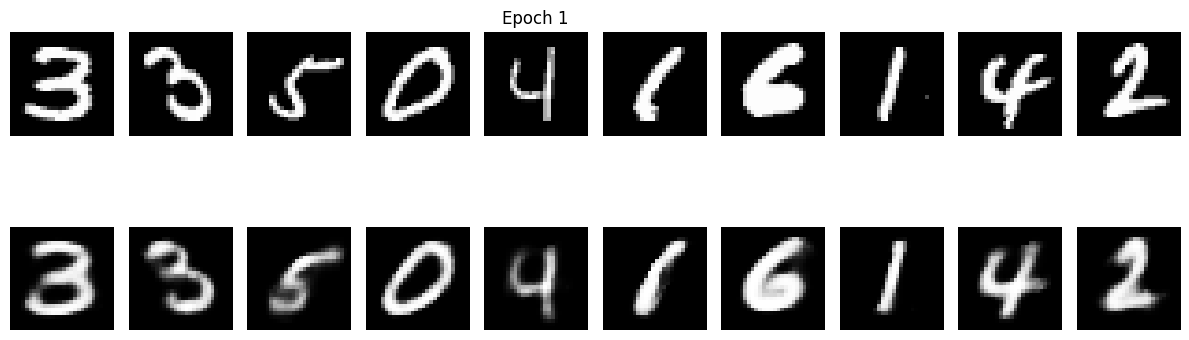

Epoch [2/100], Loss: 0.0190
Epoch [3/100], Loss: 0.0189
Epoch [4/100], Loss: 0.0188
Epoch [5/100], Loss: 0.0187
Epoch [6/100], Loss: 0.0186
Epoch [7/100], Loss: 0.0185
Epoch [8/100], Loss: 0.0185
Epoch [9/100], Loss: 0.0183
Epoch [10/100], Loss: 0.0183
Epoch [11/100], Loss: 0.0183


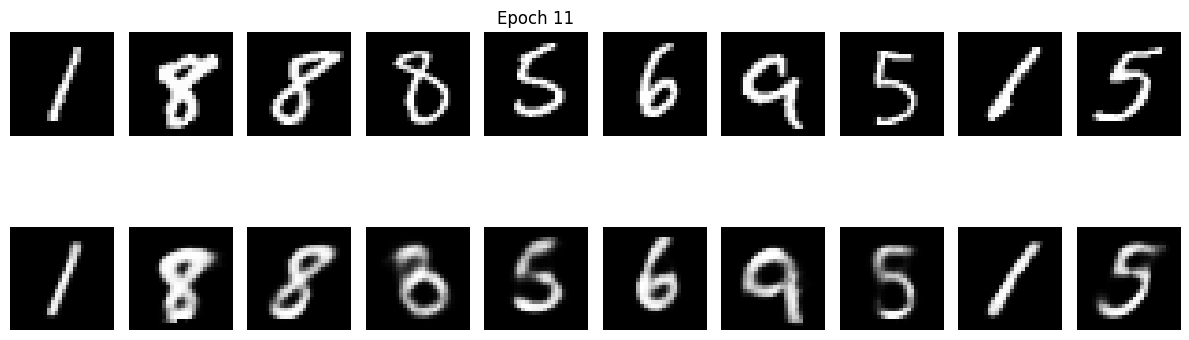

Epoch [12/100], Loss: 0.0182
Epoch [13/100], Loss: 0.0181
Epoch [14/100], Loss: 0.0180
Epoch [15/100], Loss: 0.0180
Epoch [16/100], Loss: 0.0180
Epoch [17/100], Loss: 0.0179
Epoch [18/100], Loss: 0.0178
Epoch [19/100], Loss: 0.0178
Epoch [20/100], Loss: 0.0178
Epoch [21/100], Loss: 0.0177


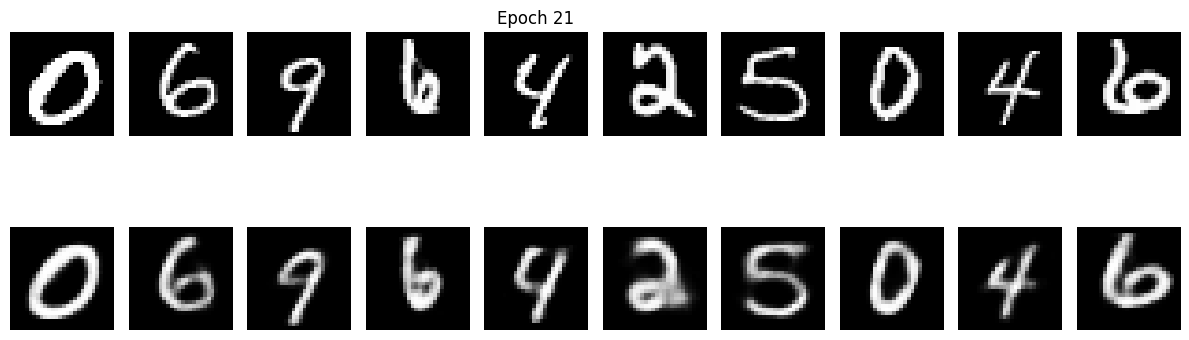

Epoch [22/100], Loss: 0.0177
Epoch [23/100], Loss: 0.0176
Epoch [24/100], Loss: 0.0176
Epoch [25/100], Loss: 0.0176
Epoch [26/100], Loss: 0.0175
Epoch [27/100], Loss: 0.0175
Epoch [28/100], Loss: 0.0175
Epoch [29/100], Loss: 0.0174
Epoch [30/100], Loss: 0.0174
Epoch [31/100], Loss: 0.0173


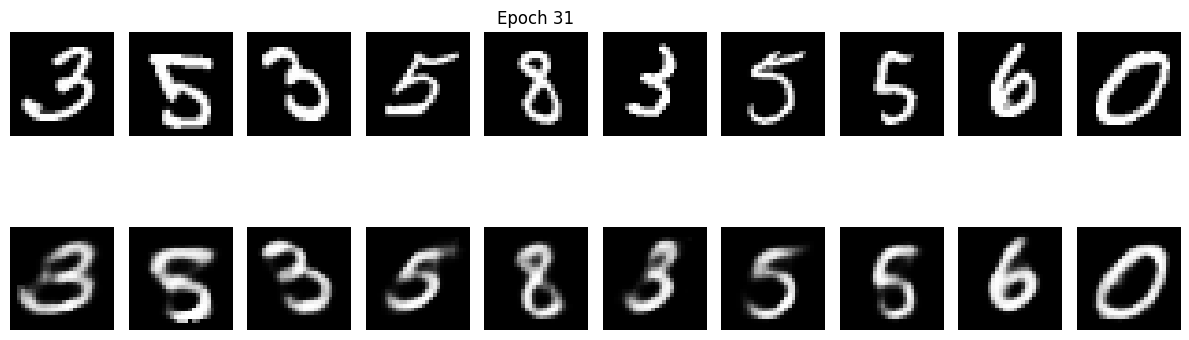

Epoch [32/100], Loss: 0.0173
Epoch [33/100], Loss: 0.0173
Epoch [34/100], Loss: 0.0173
Epoch [35/100], Loss: 0.0172
Epoch [36/100], Loss: 0.0172
Epoch [37/100], Loss: 0.0172
Epoch [38/100], Loss: 0.0172
Epoch [39/100], Loss: 0.0171
Epoch [40/100], Loss: 0.0171
Epoch [41/100], Loss: 0.0171


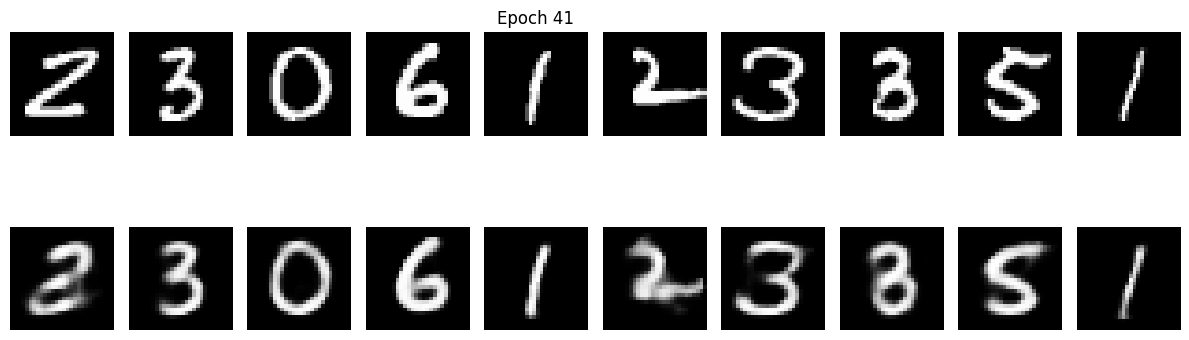

Epoch [42/100], Loss: 0.0172
Epoch [43/100], Loss: 0.0171
Epoch [44/100], Loss: 0.0170
Epoch [45/100], Loss: 0.0170
Epoch [46/100], Loss: 0.0170
Epoch [47/100], Loss: 0.0170
Epoch [48/100], Loss: 0.0170
Epoch [49/100], Loss: 0.0170
Epoch [50/100], Loss: 0.0169
Epoch [51/100], Loss: 0.0169


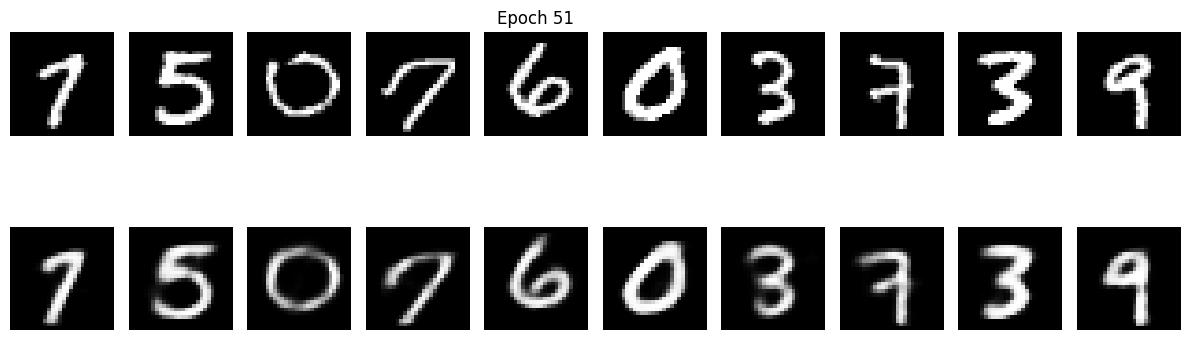

Epoch [52/100], Loss: 0.0169
Epoch [53/100], Loss: 0.0168
Epoch [54/100], Loss: 0.0168
Epoch [55/100], Loss: 0.0168
Epoch [56/100], Loss: 0.0168
Epoch [57/100], Loss: 0.0168
Epoch [58/100], Loss: 0.0168
Epoch [59/100], Loss: 0.0168
Epoch [60/100], Loss: 0.0167
Epoch [61/100], Loss: 0.0167


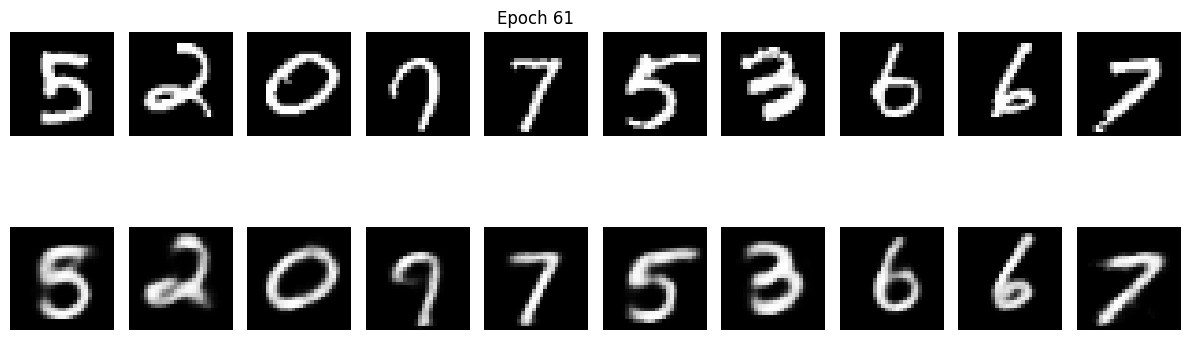

Epoch [62/100], Loss: 0.0167
Epoch [63/100], Loss: 0.0168
Epoch [64/100], Loss: 0.0167
Epoch [65/100], Loss: 0.0167
Epoch [66/100], Loss: 0.0166
Epoch [67/100], Loss: 0.0166
Epoch [68/100], Loss: 0.0166
Epoch [69/100], Loss: 0.0166
Epoch [70/100], Loss: 0.0166
Epoch [71/100], Loss: 0.0166


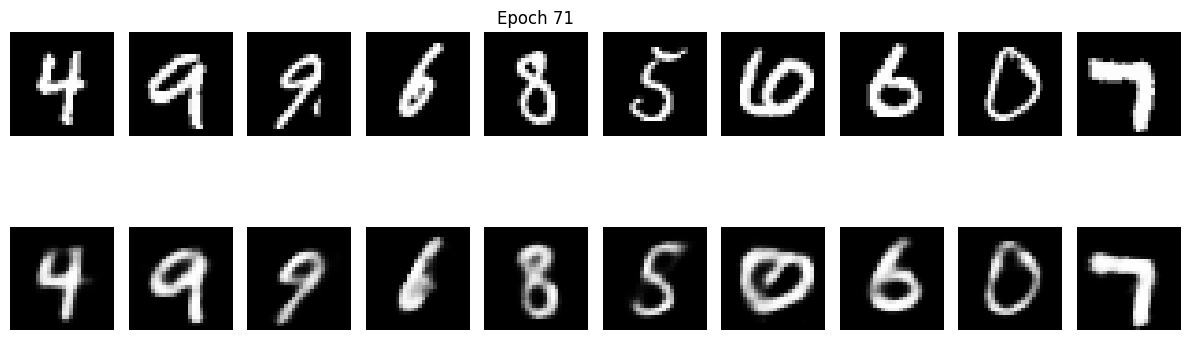

Epoch [72/100], Loss: 0.0166
Epoch [73/100], Loss: 0.0165
Epoch [74/100], Loss: 0.0166
Epoch [75/100], Loss: 0.0166
Epoch [76/100], Loss: 0.0166
Epoch [77/100], Loss: 0.0165
Epoch [78/100], Loss: 0.0165
Epoch [79/100], Loss: 0.0165
Epoch [80/100], Loss: 0.0165
Epoch [81/100], Loss: 0.0164


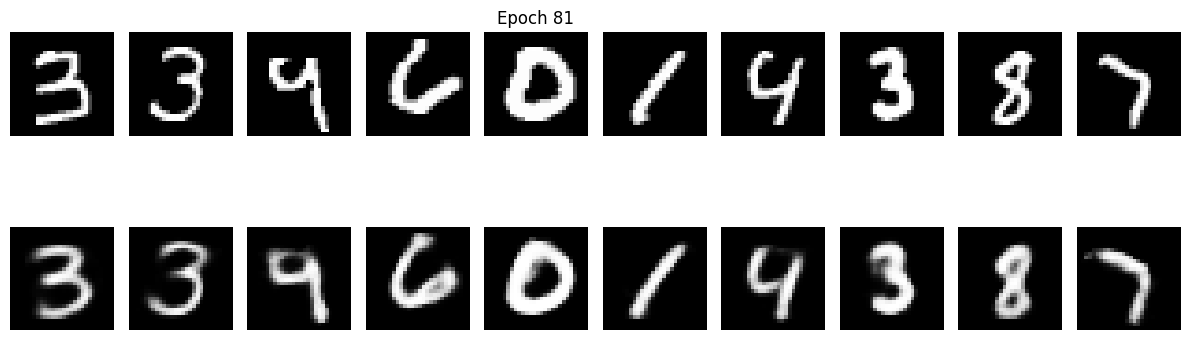

Epoch [82/100], Loss: 0.0165
Epoch [83/100], Loss: 0.0165
Epoch [84/100], Loss: 0.0164
Epoch [85/100], Loss: 0.0164
Epoch [86/100], Loss: 0.0164
Epoch [87/100], Loss: 0.0164
Epoch [88/100], Loss: 0.0164
Epoch [89/100], Loss: 0.0164
Epoch [90/100], Loss: 0.0163
Epoch [91/100], Loss: 0.0164


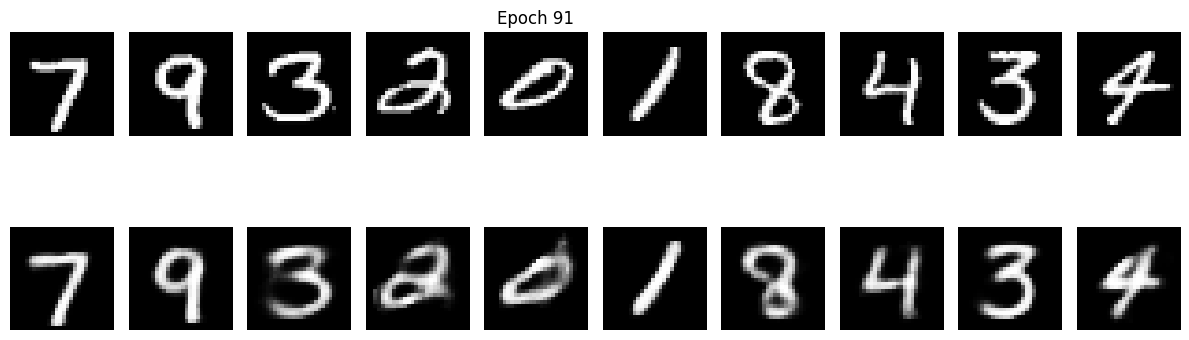

Epoch [92/100], Loss: 0.0165
Epoch [93/100], Loss: 0.0163
Epoch [94/100], Loss: 0.0163
Epoch [95/100], Loss: 0.0163
Epoch [96/100], Loss: 0.0163
Epoch [97/100], Loss: 0.0163
Epoch [98/100], Loss: 0.0163
Epoch [99/100], Loss: 0.0162
Epoch [100/100], Loss: 0.0162


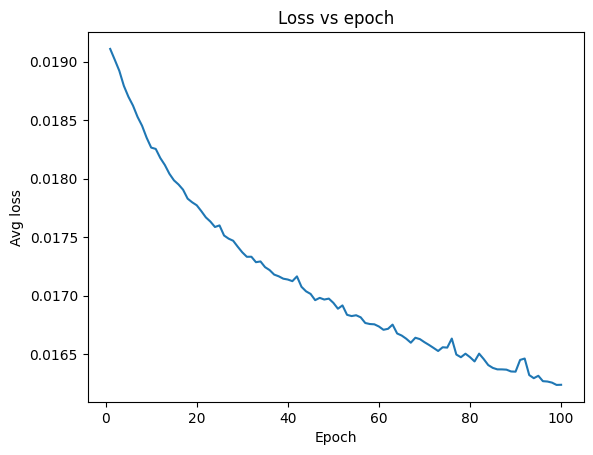

In [42]:
## Train

stored_loss = torch.zeros((n_epochs))
for epoch in range(n_epochs):
    total_loss = 0
    for image, _ in train_load:
        image = image.to(device)
        reconstructed_img, _ = ae(image)
        loss = criterion(reconstructed_img, image)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    stored_loss[epoch] = total_loss/len(train_load)
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {total_loss/len(train_load):.4f}")
    if epoch % 10 == 0:
        plot_reconstructions(ae, train_load, epoch)

x = np.linspace(1,n_epochs,n_epochs)
plt.plot(x, stored_loss)
plt.title("Loss vs epoch")
plt.xlabel("Epoch")
plt.ylabel("Avg loss")

plt.show()

In [11]:
## One_hot function for a latent vector
import random
def one_hot(desired):
    Y = torch.zeros((1,10))
    Y[0, desired] = 1
    return Y.to(device)

def test_img(number):
    latent_vector = one_hot(number).to(device)
    with torch.no_grad():
        generated_img = decoder(latent_vector)
    gen_img = generated_img.cpu()
    plt.imshow(gen_img.squeeze().numpy(), cmap='gray')
    plt.title(f"Expected: {number}")
    plt.axis('off')
    plt.show()

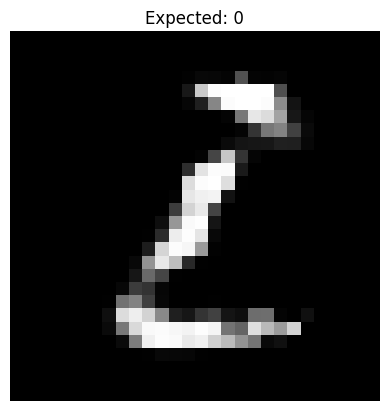

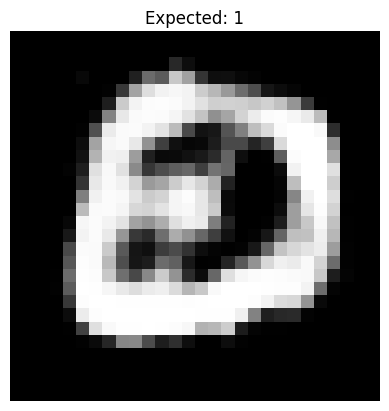

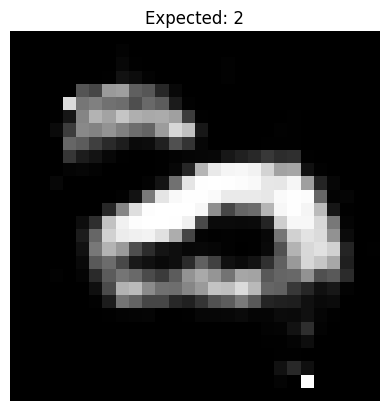

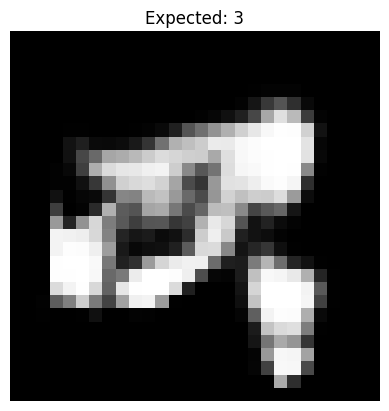

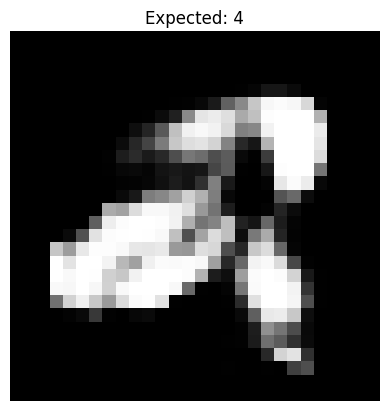

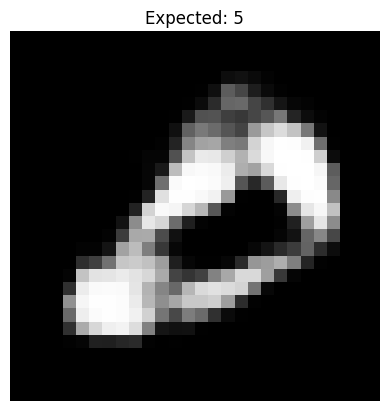

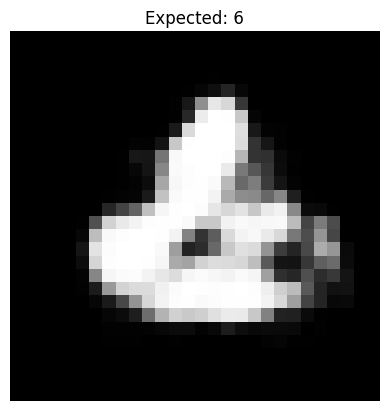

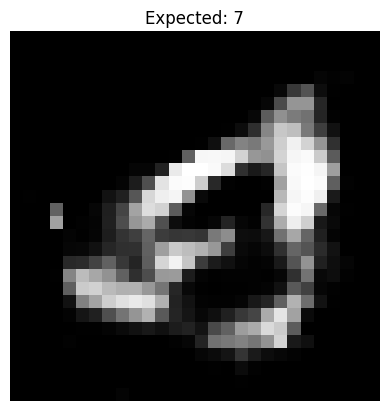

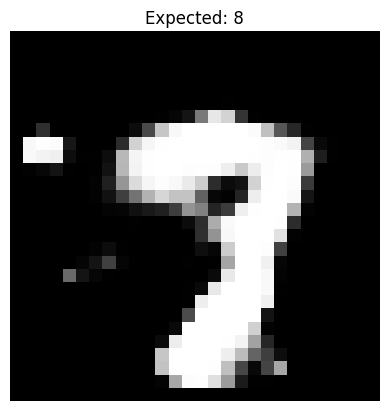

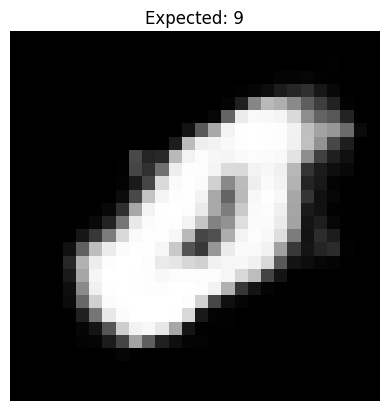

In [43]:
#test_img(random.randint(0,9))

for i in range(10):
    test_img(i)

In [ ]:
def plot_reconstructions(model, data_loader, epoch):
    model.eval()
    with torch.no_grad():
        original_img, _ = next(iter(data_loader))
        original_img = original_img.to(device)
        recons_img, _ = model(original_img)

    original_img = original_img.cpu()
    recons_img = recons_img.cpu()

    figs, axes = plt.subplots(2, 5, figsize=(12,5))
    for i in range(5):
        #imagenes originales
        axes[0,i].imshow(original_img[i].squeeze(), cmap="grey")
        axes[0,i].axis("off")
        if i == 2:
            axes[0,i].set_tittle(f"Epoch {epoch+1}")
        #imagenes reconstruidas
        axes[1,i].imshow(recons_img[i].squeeze(), cmap="grey")
        axes[1,i].axis("off")
    plt.tight_layout()
    plt.show()
    model.train()